The Autoregressive (AR) model is a fundamental time series analysis technique that predicts future values based on a linear combination of past observations. The key principles are:

1. Linear Dependency: AR models assume that current values can be expressed as a linear function of previous values plus some random error (white noise)

2. Order (p): The number of lagged observations used in the model. An AR(p) model uses p previous values to predict the current value

3. Stationarity: AR models typically require the time series to be stationary, meaning its statistical properties (mean, variance) are constant over time

4. Mathematical Form: The general form of an AR(p) model is:
   X_t = c + φ₁X_{t-1} + φ₂X_{t-2} + ... + φ_pX_{t-p} + ε_t
   where:
   - X_t is the current value
   - c is a constant
   - φ₁...φ_p are model parameters
   - ε_t is white noise

AR models are widely used in forecasting financial time series, economic indicators, and other temporal data where there is a dependency on past values.





YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
/opt/quantfree/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/quantfree/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/quantfree/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/quantfree/lib/python3.12/site-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, an

Mean Squared Error: 465.08


<Axes: title={'center': 'Apple AR Strategy Cumulative Returns'}, xlabel='Date'>

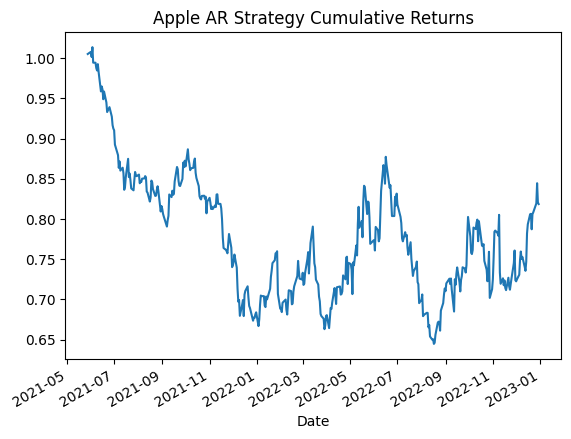

In [1]:
# AR Strategy for Apple
import pandas as pd
import numpy as np
import yfinance as yf
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

# Download Apple stock data
ticker = 'AAPL'
data = yf.download(ticker, start='2015-01-01', end='2023-01-01')
# data = data.asfreq('D', method='pad')
prices = data['Close']

# Split into train and test sets
train_size = int(len(prices) * 0.8)
train, test = prices[:train_size], prices[train_size:]

# Fit AR model
window = 5  # Use 5 previous days as predictors
model = AutoReg(train, lags=window)
model_fit = model.fit()

# Make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1)

# Evaluate model
mse = mean_squared_error(test, predictions)
print(f'Mean Squared Error: {mse:.2f}')

# Create trading signals
signals = pd.DataFrame(index=test.index)
signals['price'] = test
signals['prediction'] = predictions
signals['signal'] = np.where(signals['prediction'] > signals['price'], 1, -1)

# Backtest strategy
signals['returns'] = signals['price'].pct_change()
signals['strategy_returns'] = signals['signal'].shift(1) * signals['returns']
signals['cumulative_returns'] = (1 + signals['strategy_returns']).cumprod()

# Plot results
signals['cumulative_returns'].plot(title='Apple AR Strategy Cumulative Returns')


[*********************100%***********************]  1 of 1 completed


/opt/quantfree/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/quantfree/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/quantfree/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/quantfree/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressi

ARMA Mean Squared Error: 0.00


/opt/quantfree/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/quantfree/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Axes: title={'center': '{ticker} ARMA Strategy Cumulative Returns'}, xlabel='Date'>

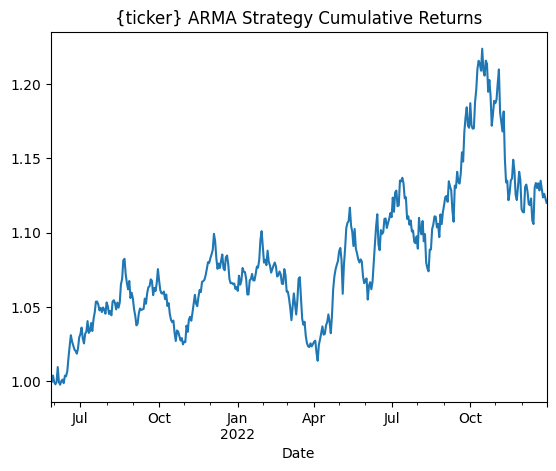

In [8]:
# ARMA Strategy for AUD/USD
from statsmodels.tsa.arima.model import ARIMA
import yfinance as yf

# Download AUD/USD data
ticker = 'AUDUSD=X'
data = yf.download(ticker, start='2015-01-01', end='2023-01-01')
prices = data['Close']

# Split into train and test sets
train_size = int(len(prices) * 0.8)
train, test = prices[:train_size], prices[train_size:]

# Fit ARMA model (ARIMA(p,0,q))
arma_model = ARIMA(train, order=(2, 0, 1))  # AR(2) and MA(1)
arma_fit = arma_model.fit()

# Make predictions
arma_predictions = arma_fit.predict(start=len(train), end=len(train)+len(test)-1)

# Evaluate model
arma_mse = mean_squared_error(test, arma_predictions)
print(f'ARMA Mean Squared Error: {arma_mse:.2f}')

# Create trading signals
arma_signals = pd.DataFrame(index=test.index)
arma_signals['price'] = test
arma_signals['prediction'] = arma_predictions
arma_signals['signal'] = np.where(arma_signals['prediction'] > arma_signals['price'], 1, -1)

# Backtest strategy
arma_signals['returns'] = arma_signals['price'].pct_change()
arma_signals['strategy_returns'] = arma_signals['signal'].shift(1) * arma_signals['returns']
arma_signals['cumulative_returns'] = (1 + arma_signals['strategy_returns']).cumprod()

# Plot results
arma_signals['cumulative_returns'].plot(title='{ticker} ARMA Strategy Cumulative Returns')


# Vector Autoregression (VAR) Algorithm

Vector Autoregression (VAR) is a multivariate time series model that extends the univariate autoregressive (AR) model to capture linear interdependencies among multiple time series. The key features of VAR include:

1. **Multivariate Analysis**: VAR models multiple time series simultaneously, capturing relationships between variables.

2. **Mathematical Representation**: A VAR(p) model with k variables can be written as:
   Y_t = c + A_1 Y_{t-1} + A_2 Y_{t-2} + ... + A_p Y_{t-p} + ε_t
   where:
   - Y_t is a k×1 vector of variables at time t
   - c is a k×1 vector of constants
   - A_i are k×k matrices of coefficients
   - ε_t is a k×1 vector of error terms

3. **Implementation Steps**:
   - Test for stationarity and transform data if needed
   - Determine optimal lag order using information criteria (AIC, BIC)
   - Estimate model parameters
   - Validate model with diagnostic tests
   - Generate forecasts

4. **Applications**: VAR is particularly useful for financial time series where multiple assets or economic indicators influence each other, such as currency pairs, stock prices, or macroeconomic variables.

5. **Advantages**: Captures complex dynamics and interdependencies between variables without requiring structural economic theory.

In our implementation, we use VAR to model relationships between multiple currency pairs, generating trading signals based on the predicted movements.


[*********************100%***********************]  3 of 3 completed


/opt/quantfree/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


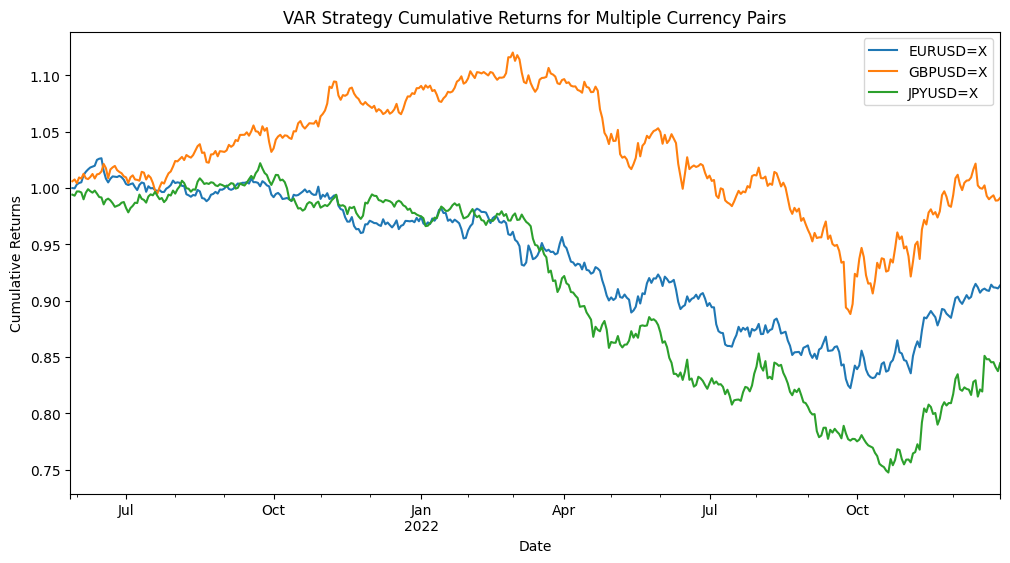

In [12]:
# VAR Strategy for Multiple Currency Pairs with Error Handling
from statsmodels.tsa.api import VAR
import yfinance as yf
import matplotlib.pyplot as plt  # 添加这行

# Download multiple currency pairs data
tickers = ['EURUSD=X', 'GBPUSD=X', 'JPYUSD=X']
data = yf.download(tickers, start='2015-01-01', end='2023-01-01')['Close']

data = data.dropna()  # 删除缺失值
data = data.replace([np.inf, -np.inf], np.nan).dropna()  # 处理无穷值

# Split into train and test sets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Fit VAR model
var_model = VAR(train)
var_fit = var_model.fit(maxlags=2)  # Using 2 lags

# Make predictions
var_predictions = var_fit.forecast(train.values[-var_fit.k_ar:], steps=len(test))

# Convert predictions to DataFrame
var_predictions = pd.DataFrame(var_predictions, index=test.index, columns=test.columns)

# Create trading signals for each currency pair
var_signals = pd.DataFrame(index=test.index)
for ticker in tickers:
    var_signals[f'{ticker}_price'] = test[ticker]
    var_signals[f'{ticker}_prediction'] = var_predictions[ticker]
    var_signals[f'{ticker}_signal'] = np.where(
        var_signals[f'{ticker}_prediction'] > var_signals[f'{ticker}_price'], 1, -1)

# Backtest strategy for each currency pair
for ticker in tickers:
    var_signals[f'{ticker}_returns'] = var_signals[f'{ticker}_price'].pct_change()
    var_signals[f'{ticker}_strategy_returns'] = (
        var_signals[f'{ticker}_signal'].shift(1) * var_signals[f'{ticker}_returns'])
    var_signals[f'{ticker}_cumulative_returns'] = (
        1 + var_signals[f'{ticker}_strategy_returns']).cumprod()

# Plot results for each currency pair
plt.figure(figsize=(12, 6))
for ticker in tickers:
    var_signals[f'{ticker}_cumulative_returns'].plot(label=ticker)
plt.title('VAR Strategy Cumulative Returns for Multiple Currency Pairs')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()





The Hurst Exponent (H) measures long-term memory in time series using the relationship between variance and time scale. For a time series $X_t$:

$$H = \frac{\log(R/S)}{\log(\tau)}$$
where $R/S = \frac{\max(X_t) - \min(X_t)}{\sigma(X_t)}$ for $t \in [1,\tau]$

The Variance Ratio Test (VR) compares variance across different time intervals. For a series $X_t$ with $n$ observations and lag $k$:

$$VR(k) = \frac{\text{Var}(X_t - X_{t-k})}{k \cdot \text{Var}(X_t - X_{t-1})}$$
For a random walk, $VR(k) \approx 1$. If $VR(k) < 1$ suggests mean-reversion, while $VR(k) > 1$ indicates trending behavior.


The Hurst Exponent (H) measures long-term memory in time series using the relationship between variance and time scale. For a time series X_t, it's calculated as:

H = slope of log(τ) vs log(R/S)
where R/S = (max(X_t) - min(X_t)) / std(X_t) for t ∈ [1,τ]

The Variance Ratio Test (VR) compares variance across different time intervals. For a series X_t with n observations and lag k, it's computed as:

VR(k) = Var(X_t - X_{t-k}) / (k * Var(X_t - X_{t-1})) 

where Var() is the sample variance. For a random walk, VR(k) ≈ 1. If VR(k) < 1, it suggests mean-reversion, and VR(k) > 1 indicates trending behavior.
End of Selection



[*********************100%***********************]  3 of 3 completed


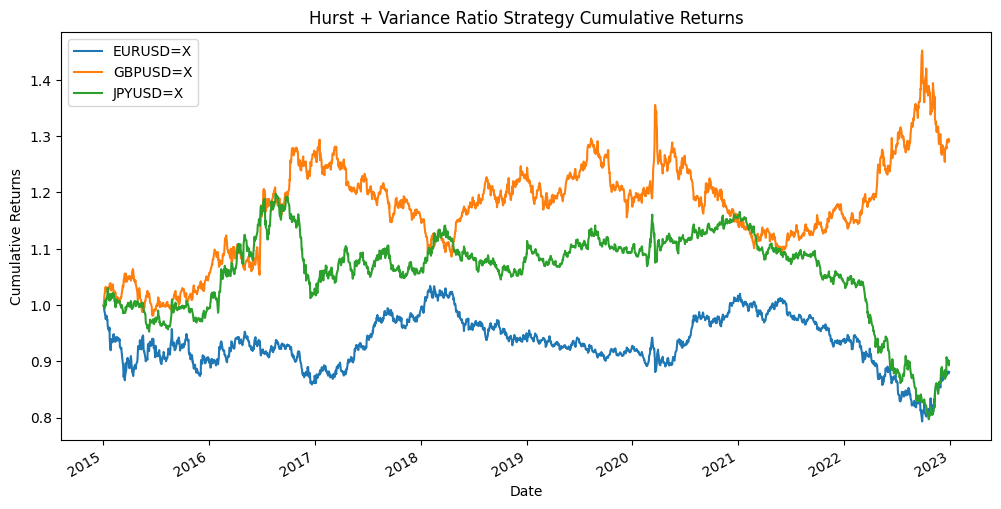

In [3]:

# VAR Strategy for Multiple Currency Pairs with Error Handling
from statsmodels.tsa.api import VAR
import yfinance as yf
import matplotlib.pyplot as plt  # 添加这行

# Download multiple currency pairs data
tickers = ['EURUSD=X', 'GBPUSD=X', 'JPYUSD=X']
data = yf.download(tickers, start='2015-01-01', end='2023-01-01')['Close']

data = data.dropna()  # 删除缺失值
data = data.replace([np.inf, -np.inf], np.nan).dropna()  # 处理无穷值

# Calculate Hurst Exponent and Variance Ratio for each currency pair
def hurst_exponent(ts):
    """Returns the Hurst Exponent of the time series"""
    lags = range(2, 100)
    tau = [np.std(np.subtract(ts[lag:], ts[:-lag])) for lag in lags]
    poly = np.polyfit(np.log(lags), np.log(tau), 1)
    return poly[0]

# The hurst_exponent function calculates the Hurst exponent for a time series.
# The Hurst exponent is a measure of the long-term memory of a time series and indicates:
# - H ≈ 0.5: Random walk (no memory, uncorrelated)
# - 0 < H < 0.5: Mean-reverting (anti-persistent) behavior
# - 0.5 < H < 1: Trending (persistent) behavior
#
# The calculation works by:
# 1. Creating a range of lag values (2 to 99)
# 2. For each lag, calculating the standard deviation of the differenced series
# 3. Fitting a line to the log-log plot of lags vs. standard deviations
# 4. The slope of this line is the Hurst exponent
#
# The theoretical basis comes from the property that for a random walk:
#   std(X_t+τ - X_t) ∝ τ^H
# where H = 0.5 for a true random walk

def variance_ratio(ts, lag=2):
    """Returns the variance ratio test statistic"""
    n = len(ts)
    mu = np.mean(np.diff(ts))
    m = (n - lag + 1) * (1 - lag/n)
    b = np.sum((ts[lag:] - ts[:-lag] - lag*mu)**2) / m
    a = np.sum((ts[1:] - ts[:-1] - mu)**2) / (n-1)
    return b / (lag*a)

# Create signals based on mean-reversion (Hurst < 0.5) or trend-following (Hurst > 0.5)
hurst_signals = pd.DataFrame(index=data.index)
for ticker in tickers:
    # Calculate rolling Hurst and Variance Ratio
    hurst_values = data[ticker].rolling(window=60).apply(hurst_exponent)
    vr_values = data[ticker].rolling(window=60).apply(variance_ratio)
    
    # Generate signals
    hurst_signals[f'{ticker}_price'] = data[ticker]
    hurst_signals[f'{ticker}_hurst'] = hurst_values
    hurst_signals[f'{ticker}_vr'] = vr_values
    
    # Mean-reversion strategy when Hurst < 0.5 and VR < 1
    hurst_signals[f'{ticker}_signal'] = np.where(
        (hurst_signals[f'{ticker}_hurst'] < 0.5) & (hurst_signals[f'{ticker}_vr'] < 1),
        -np.sign(hurst_signals[f'{ticker}_price'].diff()),
        1)
    
    # Trend-following strategy when Hurst > 0.5 and VR > 1
    hurst_signals[f'{ticker}_signal'] = np.where(
        (hurst_signals[f'{ticker}_hurst'] > 0.5) & (hurst_signals[f'{ticker}_vr'] > 1),
        np.sign(hurst_signals[f'{ticker}_price'].diff()),
        hurst_signals[f'{ticker}_signal'])

# Backtest strategy for each currency pair
for ticker in tickers:
    hurst_signals[f'{ticker}_returns'] = hurst_signals[f'{ticker}_price'].pct_change()
    hurst_signals[f'{ticker}_strategy_returns'] = (
        hurst_signals[f'{ticker}_signal'].shift(1) * hurst_signals[f'{ticker}_returns'])
    hurst_signals[f'{ticker}_cumulative_returns'] = (
        1 + hurst_signals[f'{ticker}_strategy_returns']).cumprod()

# Plot results
plt.figure(figsize=(12, 6))
for ticker in tickers:
    hurst_signals[f'{ticker}_cumulative_returns'].plot(label=ticker)
plt.title('Hurst + Variance Ratio Strategy Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()


# Hurst Exponent with p=2 (Quadratic Variation)

The Hurst exponent (H) measures the long-term memory or persistence in a time series.
When using p=2, we analyze the scaling of quadratic variations: E[|X_{t+τ} - X_t|^2] ~ τ^(2H)

For a time series X_t, the p=2 Hurst exponent examines how the mean squared differences
scale with increasing time intervals (τ). Mathematically, we estimate H by finding the slope
of log(E[|X_{t+τ} - X_t|^2]) vs log(τ) and dividing by 2.

Interpretation:
- H < 0.5: Mean-reverting series (anti-persistent) - large changes tend to be followed by reversals
- H = 0.5: Random walk (Brownian motion) - changes are independent
- H > 0.5: Trend-following series (persistent) - trends tend to continue

The p=2 version is particularly useful in financial time series analysis as it relates
directly to volatility scaling and provides insights into market efficiency.


# The Xt model for mean reversion when VR(k) < 1 (shorter-term volatility exceeds longer-term) is:

Xt = μ + ρ(Xt-1 - μ) + εt

where:
- μ is the long-term mean
- ρ is the mean reversion parameter (0 < ρ < 1)
- εt ~ N(0, σ²) is the random shock

VR(k) < 1 indicates mean reversion because:
E[(Xt - Xt-k)²] = σ²(1 - ρ^k)/(1 - ρ)
For small k, this variance exceeds the random walk variance (kσ²), resulting in VR(k) = (1 - ρ^k)/(k(1 - ρ)) < 1







YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  3 of 3 completed


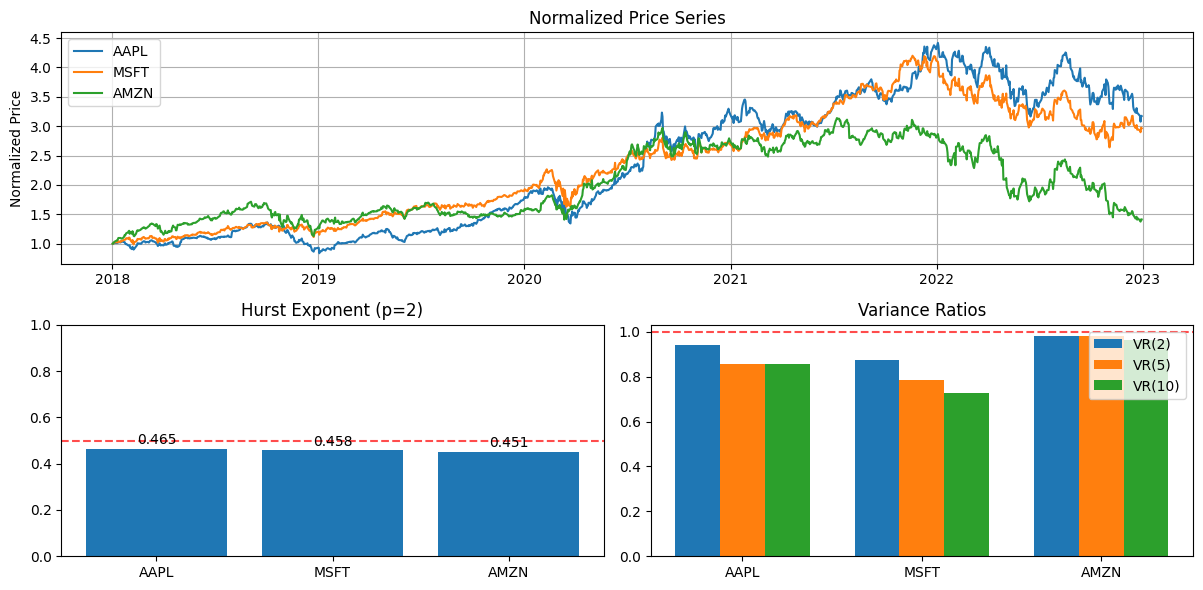


Hurst Exponent (p=2) and Variance Ratio Analysis:
     Hurst (p=2)     VR(2)     VR(5)    VR(10) Interpretation
AAPL    0.464829  0.943159   0.85488  0.857713    Random walk
MSFT    0.458105  0.875947  0.783689  0.726595    Random walk
AMZN    0.450891  0.981681  0.980561  0.961967    Random walk


In [1]:
# Hurst Exponent and Variance Ratio Analysis
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Download data for analysis
tickers = ['AAPL', 'MSFT', 'AMZN']
data = yf.download(tickers, start='2018-01-01', end='2023-01-01')['Close']

# Calculate Hurst Exponent with p=2 (quadratic variation)
def hurst_exponent_p2(ts, max_lag=100):
    """
    Calculate the Hurst exponent using p=2 (quadratic variation)
    For a time series X_t, we measure E[|X_{t+τ} - X_t|^2] across different lags τ
    H is the slope of log(τ) vs log(E[|X_{t+τ} - X_t|^2])
    
    Parameters:
    -----------
    ts : array-like
        Time series data
    max_lag : int
        Maximum lag to consider
        
    Returns:
    --------
    float
        Hurst exponent
    """
    # Convert to numpy array if needed
    ts = np.asarray(ts)
    
    # Use lags from 2 to max_lag
    lags = range(2, min(max_lag, len(ts)//4))
    
    # Calculate quadratic variations for different lags
    # E[|X_{t+τ} - X_t|^2] is estimated by the mean squared difference
    tau = [np.mean(np.square(ts[lag:] - ts[:-lag])) for lag in lags]
    
    # The Hurst exponent is H = 1/2 * slope
    # For a random walk, E[|X_{t+τ} - X_t|^2] ∝ τ, so H = 0.5
    poly = np.polyfit(np.log(lags), np.log(tau), 1)
    
    # Return H = slope/2 (because we're using squared differences)
    return poly[0]/2

def variance_ratio(ts, lag=2):
    """
    Calculate the variance ratio test statistic
    VR(k) = Var(X_t - X_{t-k}) / (k * Var(X_t - X_{t-1}))
    
    Parameters:
    -----------
    ts : array-like
        Time series data
    lag : int
        Lag to use for the test
        
    Returns:
    --------
    float
        Variance ratio
    """
    ts = np.asarray(ts)
    n = len(ts)
    
    # Calculate mean of first differences
    mu = np.mean(np.diff(ts))
    
    # Calculate long-period variance (numerator)
    m = (n - lag + 1) * (1 - lag/n)  # Adjustment for sample size
    b = np.sum((ts[lag:] - ts[:-lag] - lag*mu)**2) / m
    
    # Calculate short-period variance (denominator)
    a = np.sum((ts[1:] - ts[:-1] - mu)**2) / (n-1)
    
    # Return variance ratio
    return b / (lag*a)

# Calculate Hurst exponent and variance ratio for each ticker
results = {}
for ticker in tickers:
    # Skip if ticker has NaN values
    if data[ticker].isnull().any():
        continue
        
    # Calculate Hurst exponent with p=2
    hurst = hurst_exponent_p2(data[ticker].values)
    
    # Calculate variance ratios for different lags
    vr_2 = variance_ratio(data[ticker].values, lag=2)
    vr_5 = variance_ratio(data[ticker].values, lag=5)
    vr_10 = variance_ratio(data[ticker].values, lag=10)
    
    results[ticker] = {
        'Hurst (p=2)': hurst,
        'VR(2)': vr_2,
        'VR(5)': vr_5,
        'VR(10)': vr_10,
        'Interpretation': 'Mean-reverting' if hurst < 0.45 else 'Random walk' if 0.45 <= hurst <= 0.55 else 'Trending'
    }

# Create a figure with subplots
fig = plt.figure(figsize=(12, 6))
gs = GridSpec(2, 2, figure=fig)

# Plot 1: Price series
ax1 = fig.add_subplot(gs[0, :])
for ticker in tickers:
    if ticker in results:
        ax1.plot(data[ticker]/data[ticker].iloc[0], label=f"{ticker}")
ax1.set_title('Normalized Price Series')
ax1.set_ylabel('Normalized Price')
ax1.legend()
ax1.grid(True)

# Plot 2: Hurst exponent visualization
ax2 = fig.add_subplot(gs[1, 0])
tickers_with_results = [t for t in tickers if t in results]
hurst_values = [results[t]['Hurst (p=2)'] for t in tickers_with_results]
ax2.bar(tickers_with_results, hurst_values)
ax2.axhline(y=0.5, color='r', linestyle='--', alpha=0.7)
ax2.set_title('Hurst Exponent (p=2)')
ax2.set_ylim(0, 1)
for i, v in enumerate(hurst_values):
    ax2.text(i, v + 0.02, f'{v:.3f}', ha='center')

# Plot 3: Variance ratios
ax3 = fig.add_subplot(gs[1, 1])
x = np.arange(len(tickers_with_results))
width = 0.25
vr2_values = [results[t]['VR(2)'] for t in tickers_with_results]
vr5_values = [results[t]['VR(5)'] for t in tickers_with_results]
vr10_values = [results[t]['VR(10)'] for t in tickers_with_results]

ax3.bar(x - width, vr2_values, width, label='VR(2)')
ax3.bar(x, vr5_values, width, label='VR(5)')
ax3.bar(x + width, vr10_values, width, label='VR(10)')
ax3.axhline(y=1, color='r', linestyle='--', alpha=0.7)
ax3.set_title('Variance Ratios')
ax3.set_xticks(x)
ax3.set_xticklabels(tickers_with_results)
ax3.legend()

plt.tight_layout()
plt.show()

# Print results table
results_df = pd.DataFrame(results).T
print("\nHurst Exponent (p=2) and Variance Ratio Analysis:")
print(results_df)


[*********************100%***********************]  3 of 3 completed


Implementing Hurst Exponent (p=2) Trading Strategy
Applying Hurst trading strategy to AAPL...



/tmp/ipykernel_18375/2295329623.py:91: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.033578276155322495' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  strategy_df.iloc[i, strategy_df.columns.get_loc('strategy_returns')] = signal * returns.iloc[i]


Applying Hurst trading strategy to MSFT...


/tmp/ipykernel_18375/2295329623.py:91: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.02037241522760458' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  strategy_df.iloc[i, strategy_df.columns.get_loc('strategy_returns')] = signal * returns.iloc[i]


Applying Hurst trading strategy to AMZN...


/tmp/ipykernel_18375/2295329623.py:91: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.007380856462852581' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  strategy_df.iloc[i, strategy_df.columns.get_loc('strategy_returns')] = signal * returns.iloc[i]


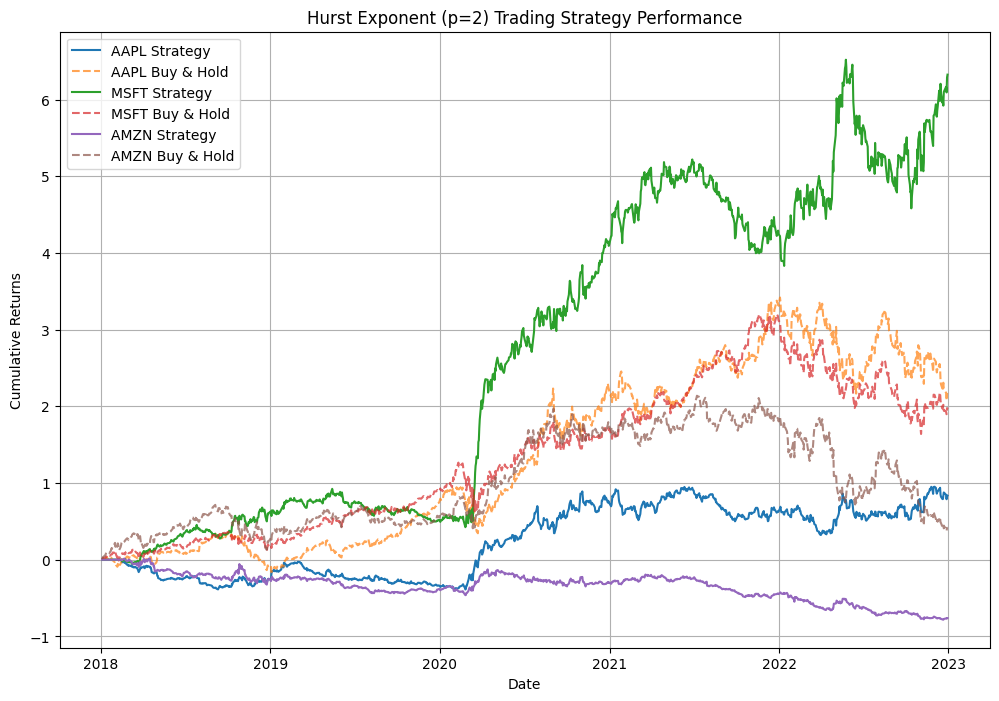


Strategy Performance Metrics:
  Ticker Strategy Return Buy & Hold Return Strategy Sharpe Buy & Hold Sharpe  \
0   AAPL          83.51%           217.29%            0.53              0.86   
1   MSFT         632.46%           196.29%            1.46              0.86   
2   AMZN         -76.09%            41.29%           -0.63              0.37   

  Max Drawdown (Strategy) Max Drawdown (Buy & Hold)  
0                 -39.06%                   -38.52%  
1                 -25.98%                   -37.15%  
2                 -78.59%                   -56.15%  


In [2]:
# Hurst Exponent Trading Strategy
print("\nImplementing Hurst Exponent (p=2) Trading Strategy")

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Download data for analysis
tickers = ['AAPL', 'MSFT', 'AMZN']
data = yf.download(tickers, start='2018-01-01', end='2023-01-01')['Close']


def hurst_trading_strategy(ticker, data, lookback=30, threshold=0.5):
    """
    Implement a trading strategy based on Hurst exponent:
    - H > 0.5: Trending market (follow the trend)
    - H < 0.5: Mean-reverting market (contrarian approach)
    - H ≈ 0.5: Random walk (no clear signal)
    
    Parameters:
    -----------
    ticker : str
        Ticker symbol
    data : pandas.DataFrame
        Price data for the ticker
    lookback : int
        Period for calculating Hurst exponent
    threshold : float
        Threshold to determine if market is trending or mean-reverting
    
    Returns:
    --------
    pandas.DataFrame
        DataFrame with signals and strategy returns
    """
    prices = data[ticker].copy()
    returns = prices.pct_change().dropna()
    
    # Initialize results
    strategy_df = pd.DataFrame(index=returns.index)
    strategy_df['returns'] = returns
    strategy_df['hurst'] = np.nan
    strategy_df['signal'] = 0
    strategy_df['strategy_returns'] = 0
    
    # Calculate rolling Hurst exponent
    for i in range(lookback, len(returns)):
        # Get the window of returns
        window = returns.iloc[i-lookback:i].values
        
        # Calculate Hurst exponent for the window
        try:
            # Calculate log returns
            log_returns = np.log(1 + window)
            
            # Calculate the variance of the log returns
            var = np.var(log_returns)
            
            # Calculate the variance of differences at different lags
            lags = range(2, min(11, lookback//2))
            variances = []
            
            for lag in lags:
                # Calculate differences at the given lag
                lagged_diff = log_returns[lag:] - log_returns[:-lag]
                # Calculate variance of the differences
                variances.append(np.var(lagged_diff) / lag)
            
            # Calculate the average variance ratio
            avg_variance_ratio = np.mean(np.array(variances) / var)
            
            # Calculate Hurst exponent (p=2)
            hurst = 0.5 * np.log(avg_variance_ratio) / np.log(2)
            
            strategy_df.iloc[i, strategy_df.columns.get_loc('hurst')] = hurst
            
            # Generate trading signal based on Hurst exponent
            if hurst > threshold + 0.05:  # Trending market
                # Follow the trend: buy if previous return is positive, sell if negative
                signal = 1 if returns.iloc[i-1] > 0 else -1
            elif hurst < threshold - 0.05:  # Mean-reverting market
                # Contrarian approach: buy if previous return is negative, sell if positive
                signal = -1 if returns.iloc[i-1] > 0 else 1
            else:  # Random walk, no clear signal
                signal = 0
                
            strategy_df.iloc[i, strategy_df.columns.get_loc('signal')] = signal
            
            # Calculate strategy returns
            strategy_df.iloc[i, strategy_df.columns.get_loc('strategy_returns')] = signal * returns.iloc[i]
            
        except Exception as e:
            print(f"Error calculating Hurst exponent at index {i}: {e}")
    
    # Calculate cumulative returns
    strategy_df['cum_returns'] = (1 + strategy_df['returns']).cumprod() - 1
    strategy_df['cum_strategy_returns'] = (1 + strategy_df['strategy_returns']).cumprod() - 1
    
    return strategy_df

# Apply the strategy to each ticker
hurst_strategy_results = {}
for ticker in tickers:
    if ticker in results:
        print(f"Applying Hurst trading strategy to {ticker}...")
        hurst_strategy_results[ticker] = hurst_trading_strategy(ticker, data)

# Plot the results
plt.figure(figsize=(12, 8))
for ticker, strategy_df in hurst_strategy_results.items():
    plt.plot(strategy_df['cum_strategy_returns'], label=f"{ticker} Strategy")
    plt.plot(strategy_df['cum_returns'], label=f"{ticker} Buy & Hold", linestyle='--', alpha=0.7)

plt.title('Hurst Exponent (p=2) Trading Strategy Performance')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()

# Performance metrics
print("\nStrategy Performance Metrics:")
metrics_df = pd.DataFrame(columns=['Ticker', 'Strategy Return', 'Buy & Hold Return', 
                                  'Strategy Sharpe', 'Buy & Hold Sharpe', 
                                  'Max Drawdown (Strategy)', 'Max Drawdown (Buy & Hold)'])

for i, (ticker, strategy_df) in enumerate(hurst_strategy_results.items()):
    # Calculate returns
    strategy_return = strategy_df['cum_strategy_returns'].iloc[-1]
    buy_hold_return = strategy_df['cum_returns'].iloc[-1]
    
    # Calculate Sharpe ratio (assuming 252 trading days per year)
    strategy_sharpe = np.sqrt(252) * strategy_df['strategy_returns'].mean() / strategy_df['strategy_returns'].std()
    buy_hold_sharpe = np.sqrt(252) * strategy_df['returns'].mean() / strategy_df['returns'].std()
    
    # Calculate maximum drawdown
    strategy_cum_returns = (1 + strategy_df['strategy_returns']).cumprod()
    buy_hold_cum_returns = (1 + strategy_df['returns']).cumprod()
    
    strategy_max_drawdown = (strategy_cum_returns / strategy_cum_returns.cummax() - 1).min()
    buy_hold_max_drawdown = (buy_hold_cum_returns / buy_hold_cum_returns.cummax() - 1).min()
    
    metrics_df.loc[i] = [ticker, 
                        f"{strategy_return:.2%}", 
                        f"{buy_hold_return:.2%}",
                        f"{strategy_sharpe:.2f}", 
                        f"{buy_hold_sharpe:.2f}",
                        f"{strategy_max_drawdown:.2%}", 
                        f"{buy_hold_max_drawdown:.2%}"]

print(metrics_df)


[*********************100%***********************]  1 of 1 completed

Running Hurst strategy for AAPL...



/tmp/ipykernel_18375/235216145.py:101: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.010258910273770017' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  strategy_df.loc[data.index[i], 'strategy_returns'] = (
[*********************100%***********************]  1 of 1 completed

Running Hurst strategy for MSFT...



/tmp/ipykernel_18375/235216145.py:101: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.01344316962663794' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  strategy_df.loc[data.index[i], 'strategy_returns'] = (
[*********************100%***********************]  1 of 1 completed

Running Hurst strategy for AMZN...



/tmp/ipykernel_18375/235216145.py:101: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.014621073252283123' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  strategy_df.loc[data.index[i], 'strategy_returns'] = (


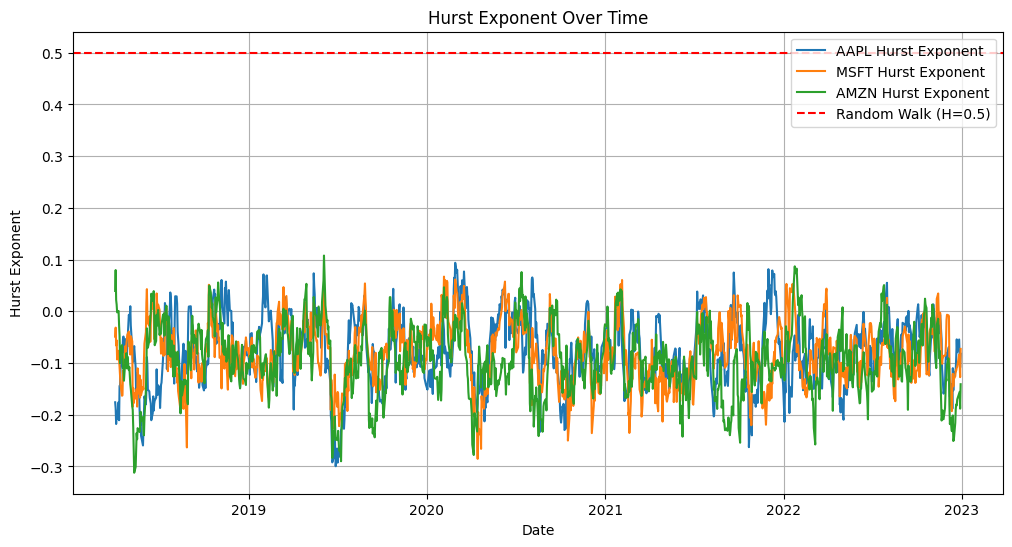

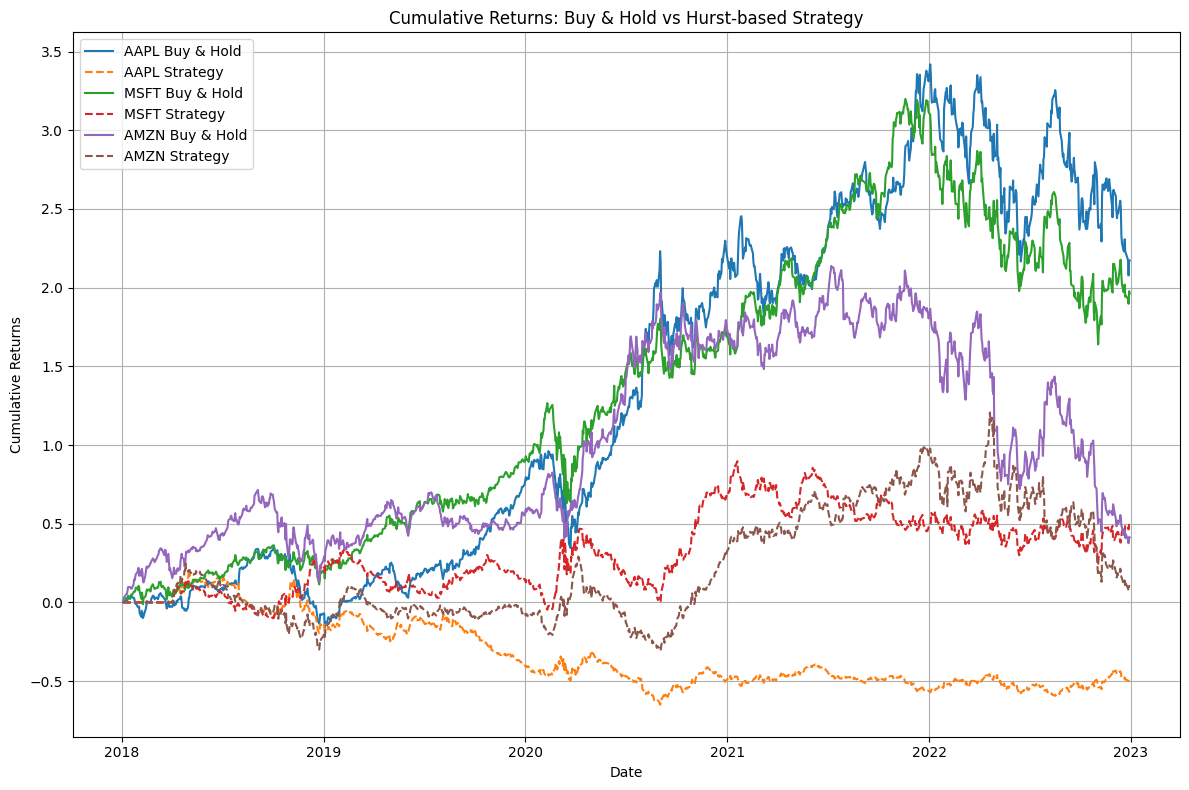

Performance Summary:
------------------------------------------------------------
Ticker     Strategy Return      Buy & Hold Return    Outperformance 
------------------------------------------------------------
AAPL       -49.73% 217.29% -267.01%
MSFT       51.23% 196.29% -145.07%
AMZN       10.30% 41.29% -31.00%


In [23]:
# Implement a Hurst Exponent Trading Strategy

def calculate_hurst_exponent(time_series, max_lag=100):
    """
    Calculate the Hurst Exponent of a time series
    
    Parameters:
    time_series (array): Time series for which to calculate Hurst exponent
    max_lag (int): Maximum lag to consider
    
    Returns:
    float: Hurst exponent
    """
    # Convert to numpy array if it's not already
    time_series = np.array(time_series)
    
    # Calculate the array of the variances of the lagged differences
    lags = range(2, max_lag)
    
    # Calculate the variance of the differences
    tau = []
    for lag in lags:
        # Ensure we have enough data points for the lag
        if len(time_series) > lag:
            # Calculate the difference and its standard deviation
            diff = np.subtract(time_series[lag:], time_series[:-lag])
            if len(diff) > 1:  # Ensure we have data after subtraction
                tau.append(np.sqrt(np.std(diff)))
    
    # If we don't have enough data points, return NaN
    if len(tau) <= 1 or len(lags) <= 1:
        return np.nan
    
    # Calculate the slope of the log-log plot -> the Hurst Exponent
    valid_lags = list(lags)[:len(tau)]
    reg = np.polyfit(np.log(valid_lags), np.log(tau), 1)
    
    return reg[0]  # Return the slope which is the Hurst exponent

def hurst_trading_strategy(ticker, start_date, end_date, window_size=30, threshold=0.5):
    """
    Implement a trading strategy based on the Hurst exponent
    
    Parameters:
    ticker (str): Stock ticker symbol
    start_date (str): Start date for data
    end_date (str): End date for data
    window_size (int): Size of the rolling window for Hurst calculation
    threshold (float): Threshold for determining mean reversion vs trend following
    
    Returns:
    DataFrame: DataFrame with strategy results
    """
    # Download data
    data = yf.download(ticker, start=start_date, end=end_date)
    
    # Calculate daily returns
    data['returns'] = data['Close'].pct_change()
    data = data.dropna()
    
    # Initialize strategy DataFrame
    strategy_df = pd.DataFrame(index=data.index)
    strategy_df['returns'] = data['returns']
    strategy_df['price'] = data['Close']
    strategy_df['hurst'] = np.nan
    strategy_df['signal'] = 0
    strategy_df['strategy_returns'] = 0
    
    # Calculate Hurst exponent for each window
    for i in range(window_size, len(data)):
        price_window = data['Close'].iloc[i-window_size:i].values
        hurst = calculate_hurst_exponent(price_window)
        
        # Use loc instead of iloc for setting values to avoid chained assignment warning
        strategy_df.loc[data.index[i], 'hurst'] = hurst
        
        # Generate trading signals based on Hurst exponent
        if not np.isnan(hurst) and hurst < threshold:  # Mean reversion regime
            # If price is above its moving average, sell (expect reversion down)
            # If price is below its moving average, buy (expect reversion up)
            ma = data['Close'].iloc[i-window_size:i].mean()
            current_price = data['Close'].iloc[i]

            current_val = current_price.item() if hasattr(current_price, 'item') else current_price
            ma_val = ma.item() if hasattr(ma, 'item') else ma
            if current_val > ma_val:
                strategy_df.loc[data.index[i], 'signal'] = -1  # Sell signal
            else:
                strategy_df.loc[data.index[i], 'signal'] = 1   # Buy signal

        elif not np.isnan(hurst):  # Trend following regime
            # If returns are positive, buy (expect trend to continue)
            # If returns are negative, sell (expect trend to continue)
            if float(data['returns'].iloc[i]) > 0:
                strategy_df.loc[data.index[i], 'signal'] = 1   # Buy signal
            else:
                strategy_df.loc[data.index[i], 'signal'] = -1  # Sell signal
        
        # Calculate strategy returns (apply signal from previous day to current day's return)
        if i > window_size:
            strategy_df.loc[data.index[i], 'strategy_returns'] = (
                strategy_df.loc[data.index[i-1], 'signal'] * 
                strategy_df.loc[data.index[i], 'returns']
            )
    
    # Calculate cumulative returns
    strategy_df['cum_returns'] = (1 + strategy_df['returns']).cumprod() - 1
    strategy_df['cum_strategy_returns'] = (1 + strategy_df['strategy_returns']).cumprod() - 1
    
    return strategy_df

# Test the Hurst exponent strategy on multiple stocks
tickers = ['AAPL', 'MSFT', 'AMZN']
start_date = '2018-01-01'
end_date = '2023-01-01'
window_size = 60  # 60-day window for Hurst calculation
threshold = 0.5   # Threshold for determining mean reversion vs trend following

# Run the strategy for each ticker
hurst_strategy_results = {}
for ticker in tickers:
    print(f"Running Hurst strategy for {ticker}...")
    hurst_strategy_results[ticker] = hurst_trading_strategy(ticker, start_date, end_date, window_size, threshold)

# Plot Hurst exponents over time
plt.figure(figsize=(12, 6))
for ticker, strategy_df in hurst_strategy_results.items():
    plt.plot(strategy_df['hurst'].dropna(), label=f"{ticker} Hurst Exponent")

plt.title('Hurst Exponent Over Time')
plt.xlabel('Date')
plt.ylabel('Hurst Exponent')
plt.axhline(y=0.5, color='r', linestyle='--', label='Random Walk (H=0.5)')
plt.legend()
plt.grid(True)
plt.show()

# Plot cumulative returns for each ticker
plt.figure(figsize=(12, 8))

for ticker, strategy_df in hurst_strategy_results.items():
    # Plot the buy-and-hold returns
    plt.plot(strategy_df.index, strategy_df['cum_returns'], 
             label=f"{ticker} Buy & Hold", linestyle='-')
    
    # Plot the strategy returns
    plt.plot(strategy_df.index, strategy_df['cum_strategy_returns'], 
             label=f"{ticker} Strategy", linestyle='--')

plt.title('Cumulative Returns: Buy & Hold vs Hurst-based Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate and display performance metrics
print("Performance Summary:")
print("-" * 60)
print(f"{'Ticker':<10} {'Strategy Return':<20} {'Buy & Hold Return':<20} {'Outperformance':<15}")
print("-" * 60)

for ticker, strategy_df in hurst_strategy_results.items():
    final_strategy_return = strategy_df['cum_strategy_returns'].iloc[-1]
    final_buy_hold_return = strategy_df['cum_returns'].iloc[-1]
    outperformance = final_strategy_return - final_buy_hold_return
    
    print(f"{ticker:<10} {final_strategy_return:,.2%} {final_buy_hold_return:,.2%} {outperformance:,.2%}")


